In [1]:
import time
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt
import pandas as pd

from Ex4_Chiloiro_CODE_myfunctions import *

# Time-independent quantum harmonic oscillator

#### Parameters
$\hbar = 1$

$ m = 1$ ; $\omega = 1$

### Finite difference method 

#### Spatial discretization

In [2]:
# -) (constant) discretization step
# -) discretization interval boundaries
# -) total number of steps (+1 cause N is the number of intervals between the x_{i}s) ex// |-|-| (2 intervals, 3 points)
# -) discrete positions

step_size = 0.01
low_int, high_int = -10, 10
N = int((high_int-low_int)/step_size)+1
x_discr = np.array([i*step_size+low_int for i in range(N)])

print(f'step_size :   {step_size} \ninterval  :   [{low_int}, {high_int}] \nn_steps   :   {N}')

step_size :   0.01 
interval  :   [-10, 10] 
n_steps   :   2001


#### Discretized Hamiltonian

In [3]:
# Second order approximation
K = kinetic_energy(N, step_size, order='second')
V = np.diag(potential(x_discr))
H = K + V

#### Eigenvalues problem

In [4]:
energies_sdord, Lambda_sdord = eigh_tridiagonal(np.diag(H), np.diag(H,k=1))
# normalize eigenstates
Lambda_sdord = normalize_eigenfunctions(Lambda_sdord, x_discr)

#### Comparison with the analytical solutions

Energies comparison

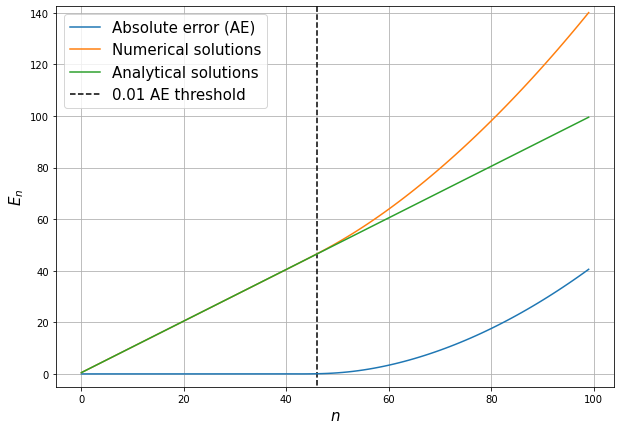

In [5]:
# for the first m energy levels...
m = 100
# ...generate analytical energy levels 
n_values = np.arange(0, m, 1)
energy_levels = [energy_level(n) for n in n_values]
# Absolute difference between theoretical and esimate values
diff_sdord = np.abs(energies_sdord[:m] - energy_levels)

# threshold
n_thr = AE_threshold(energies_sdord, 0.01) # 1% of the difference between consecutive levels

# plot
_, ax = plt.subplots(figsize = (10,7))
ax.plot(n_values, diff_sdord, label = 'Absolute error (AE)')
ax.plot(n_values, energies_sdord[:m], label = 'Numerical solutions')
ax.plot(n_values, energy_levels, label = 'Analytical solutions')
ax.vlines(n_thr, -100, energies_sdord[m]+100, linestyles='--', color='black', label = '0.01 AE threshold')
ax.set_ylim(0-5, energies_sdord[m])
ax.set_xlabel(r'$n$', fontsize = 15)
ax.set_ylabel(r'$E_n$', fontsize = 15)

ax.grid()
ax.legend(fontsize = 15)

Eigenstates comparison

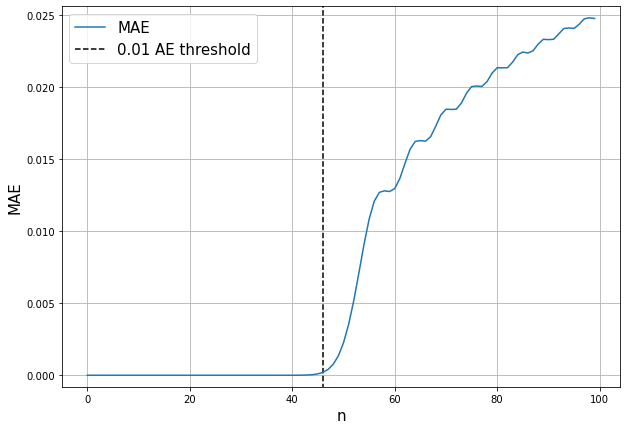

In [6]:
# MAPE between amplitudes (O(N^2)) for the first m energy levels
MAEs = np.zeros(m)
for ii in range(m):
    MAEs[ii] = np.mean((np.abs(Lambda_sdord[:,ii])**2-amplitude(x_discr, ii)))

# plot
_, ax = plt.subplots(figsize = (10,7))

ax.plot(np.arange(0, m, 1), MAEs, label = 'MAE')
plt.vlines(n_thr, -100, 100, linestyles='--', color='black', label='0.01 AE threshold')

ax.set_ylim(0-0.0008, max(MAEs)+0.0008)
ax.set_xlabel('n', fontsize = 15)
ax.set_ylabel('MAE', fontsize = 15)

ax.grid()
ax.legend(fontsize = 15)

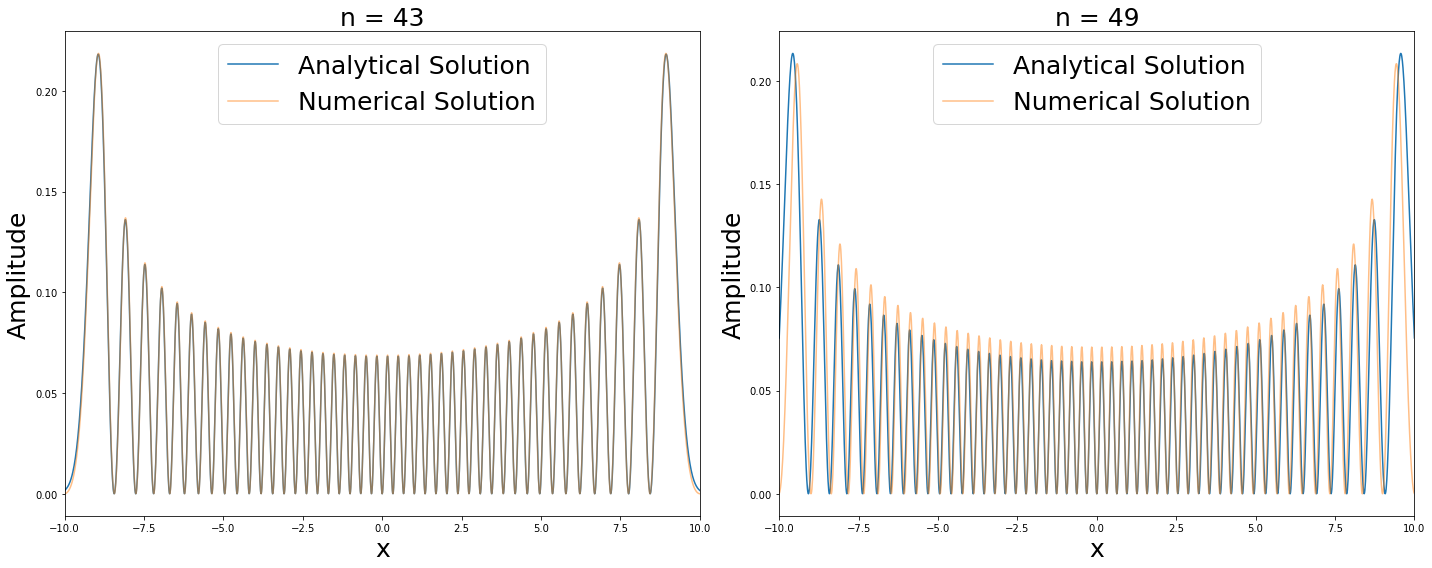

In [7]:
n_values = [n_thr-3, n_thr+3]

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
#fig.suptitle("Comparison of Eigenfunctions", fontsize = 30)

for i, n in enumerate(n_values):
    analytical_amplitudes = amplitude(x_discr, n)
    sdord_amplitudes = np.abs(Lambda_sdord[:, n]) ** 2 

    ax = axs[i]
    ax.set_title(f"n = {n}", fontsize = 25)
    ax.plot(x_discr, analytical_amplitudes, label=f"Analytical Solution")
    ax.plot(x_discr, sdord_amplitudes, label=f"Numerical Solution", alpha=.5)
    ax.legend(fontsize = 25)
    ax.set_xlim(low_int, high_int)
    ax.set_xlabel("x", fontsize = 25)
    ax.set_ylabel("Amplitude", fontsize = 25)

plt.tight_layout()
plt.show()

#### Discretization analysis

In [8]:
low_int, high_int = -5, 5

# try different step sizes
step_size_list = np.arange(0.001, 0.101, 0.001)

execution_times = np.array([])
N_vec = np.array([])

n_thr_step = np.array([])
for step_size in step_size_list:
    # grid
    N = int((high_int-low_int)/step_size)+1
    N_vec = np.append(N_vec, N)
    x_discr = np.array([i*step_size+low_int for i in range(N)])
    # hamiltonian
    K = kinetic_energy(N, step_size)
    V = np.diag(potential(x_discr))
    H = K + V
    
    # take times
    start_time = time.time()
    # energies/eigenfunctions
    energies_sdord, Lambda_sdord = eigh_tridiagonal(np.diag(H), np.diag(H,k=1))
    Lambda_sdord = normalize_eigenfunctions(Lambda_sdord, x_discr)
    end_time = time.time()
    execution_times = np.append(execution_times, end_time - start_time)
    # critical ns
    n_thr_step = np.append(n_thr_step, AE_threshold(energies_sdord, 0.01))

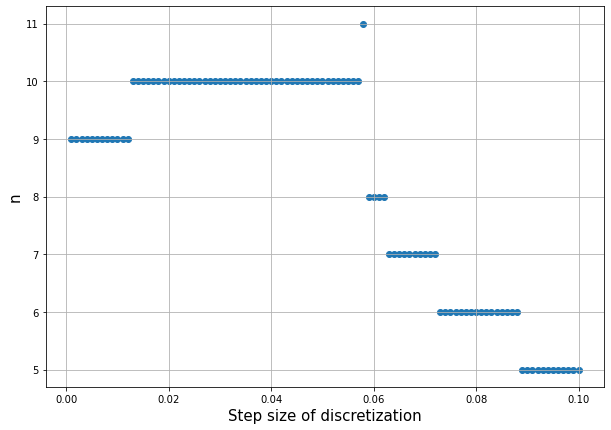

In [9]:
# plot
_, ax = plt.subplots(figsize = (10,7))
ax.scatter(step_size_list, n_thr_step)
ax.set_xlabel('Step size of discretization', fontsize = 15)
ax.set_ylabel('n', fontsize = 15)
ax.grid()

In [10]:
low_int, high_int = -10, 10

# try different step sizes
step_size_list = np.arange(0.005, 0.101, 0.001)

n_thr_step = np.array([])
for step_size in step_size_list:
    # grid
    N = int((high_int-low_int)/step_size)+1
    x_discr = np.array([i*step_size+low_int for i in range(N)])
    # hamiltonian
    K = kinetic_energy(N, step_size)
    V = np.diag(potential(x_discr))
    H = K + V
    # energies/eigenfunctions
    energies_sdord, Lambda_sdord = eigh_tridiagonal(np.diag(H), np.diag(H,k=1))
    Lambda_sdord = normalize_eigenfunctions(Lambda_sdord, x_discr)
    # critical ns
    n_thr_step = np.append(n_thr_step, AE_threshold(energies_sdord, 0.01))

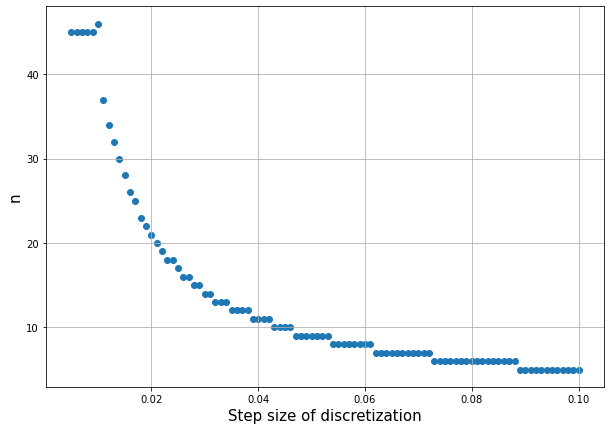

In [11]:
# plot
_, ax = plt.subplots(figsize = (10,7))
ax.scatter(step_size_list, n_thr_step)
ax.set_xlabel('Step size of discretization', fontsize = 15)
ax.set_ylabel('n', fontsize = 15)
ax.grid()

#### Runtimes

(1.4195473114518395, 1.0336903178428272e-05)

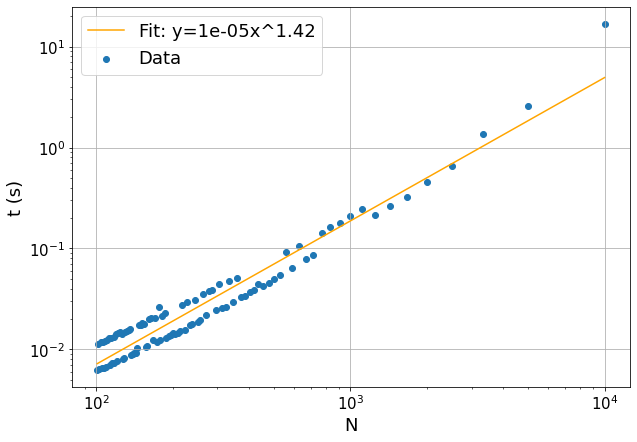

In [12]:
LinearfFitPlot(pd.DataFrame({'N':N_vec, 'Time(s)':execution_times}), '', 5, 2)